In [2]:
import numpy as np
import matplotlib.pyplot as plt
import wandb
import pandas as pd

In [2]:
df = pd.read_csv('nlp-model-dd.csv')
fr = pd.read_csv('dd-translation-model-french.csv')

In [4]:
import numpy as np
import pylab as plt
import pandas as pd
import tensorflow as tf
import pickle

#load the data "M_100.pkl" using pickle
with open('M_100.pkl', 'rb') as f:
    Ms1 = pickle.load(f)
with open('M_066.pkl', 'rb') as f:
    Ms2 = pickle.load(f)
with open('M_033.pkl', 'rb') as f:
    Ms3 = pickle.load(f)
with open('ks', 'rb') as f:
    ks = pickle.load(f)

#Ms, ks = load('cifar10-resnet18k-p15-adam-reps')

In [5]:
errs1 = np.array([M['Test Error'][:, -1] for M in Ms1])
errs2 = np.array([M['Test Error'][:, -1] for M in Ms2])
errs3 = np.array([M['Test Error'][:, -1] for M in Ms3])

p = 0.15 # fraction of noise
errs1 = 1.0 - (1-p)*(1-errs1) + errs1*p/9.0 # remap clean test error --> noisy test error.
errs2 = 1.0 - (1-p)*(1-errs2) + errs2*p/9.0 # remap clean test error --> noisy test error.
errs3 = 1.0 - (1-p)*(1-errs3) + errs3*p/9.0 # remap clean test error --> noisy test error.

stds1 = np.std(errs1, axis=0)
mean1 = np.mean(errs1, axis=0)
train_err1 = np.mean([M['Train Error'][:, -1] for M in Ms1], axis=0)

stds2 = np.std(errs2, axis=0)
mean2 = np.mean(errs2, axis=0)
train_err2 = np.mean([M['Train Error'][:, -1] for M in Ms2], axis=0)

stds3 = np.std(errs3, axis=0)
mean3 = np.mean(errs3, axis=0)
train_err3 = np.mean([M['Train Error'][:, -1] for M in Ms3], axis=0)

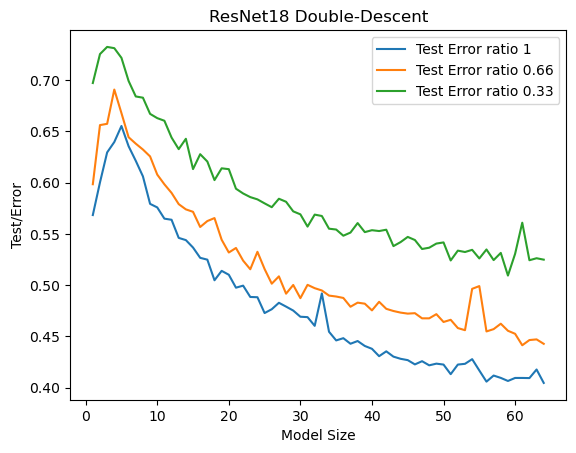

In [8]:



fig, ax = plt.subplots()
ax.plot(ks, mean1, label='Test Error ratio 1')
ax.plot(ks, mean2, label='Test Error ratio 0.66')
ax.plot(ks, mean3, label='Test Error ratio 0.33')

ax.set_xlabel("Model Size")
ax.set_ylabel("Test/Error")
ax.set_title("ResNet18 Double-Descent")
ax.legend()

Text(0.5,1,'Double Descent of Transformers')

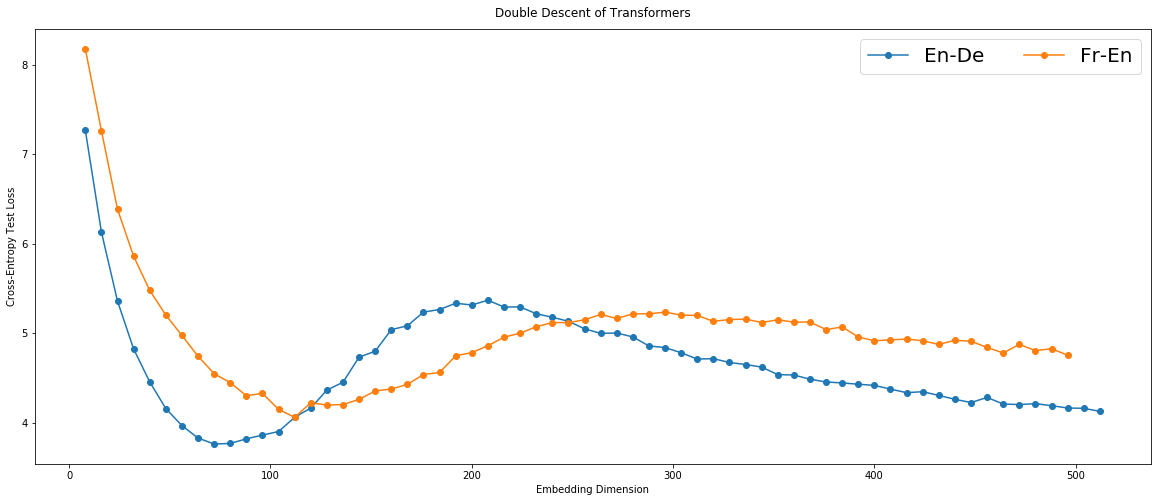

In [4]:
fig = plt.figure(figsize=(20,8))


plt.plot(df['n'],  df['test_loss'], 'o-',label='En-De')
plt.plot(fr['n'],  fr['test_loss'], 'o-',label='Fr-En')


ax = plt.gca()

plt.ylabel('Cross-Entropy Test Loss')
plt.xlabel('Embedding Dimension')
plt.legend(fontsize=20, ncol=3) 

plt.title('Double Descent of Transformers', pad=12)
